In [199]:
# FEATURE SELECTION

# Pearson Correlation
def pearson_correlation(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    corr = data.corr()
    #Plotting heatmap
    plt.figure(figsize = (10,6))
    return sns.heatmap(corr, annot=True)
    

# Information Gain
def information_gain(x, y):
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.feature_selection import SelectKBest
    # Determine the mutual information
    mutual_info = mutual_info_classif(x, y)
    # Select best five
    five_best =SelectKBest(mutual_info_classif, k=5)
    five_best.fit(x, y)
    index = x.columns[five_best.get_support()]
    score = five_best.scores_
    scores = pd.Series(score)
    scores.index = x.columns
    return index, scores

# Recursive Feature Elimination
def recursive_feature_elimination(x, y):
    from sklearn. feature_selection import RFE
    model = SGDRegressor(max_iter=1000, tol=1e-3)
    rfe = RFE(model, n_features_to_select=5)
    fit = rfe.fit(x, y)
    # Representing in list form
    feature_ranking = pd.Series(fit.ranking_)
    feature_selected = pd.Series(fit.support_)
    feature_ranking.index = x.columns
    return feature_ranking, feature_selected, feature_ranking.index

<AxesSubplot:>

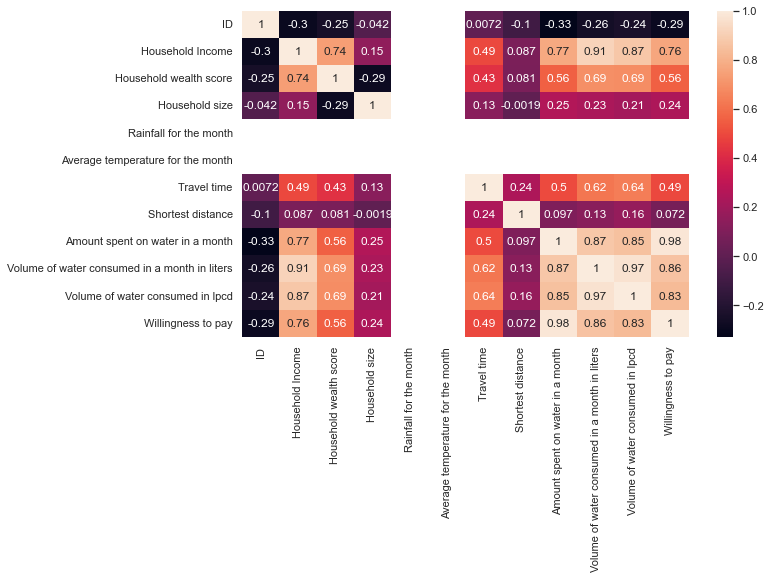

In [200]:
pearson_correlation(data)

In [201]:
information_gain(X_train, y_train)

(Index(['Household Income', 'Household wealth score', 'Travel time',
        'Amount spent on water in a month', 'Willingness to pay'],
       dtype='object'),
 Household Income                     1.387581
 Household wealth score               1.381515
 Household size                       0.190129
 Rainfall for the month               0.000000
 Average temperature for the month    0.001428
 Travel time                          1.001463
 Shortest distance                    0.067478
 Amount spent on water in a month     1.269533
 Willingness to pay                   1.158180
 dtype: float64)

In [202]:
recursive_feature_elimination(X_train, y_train)

(Household Income                     1
 Household wealth score               1
 Household size                       3
 Rainfall for the month               5
 Average temperature for the month    4
 Travel time                          2
 Shortest distance                    1
 Amount spent on water in a month     1
 Willingness to pay                   1
 dtype: int32,
 0     True
 1     True
 2    False
 3    False
 4    False
 5    False
 6     True
 7     True
 8     True
 dtype: bool,
 Index(['Household Income', 'Household wealth score', 'Household size',
        'Rainfall for the month', 'Average temperature for the month',
        'Travel time', 'Shortest distance', 'Amount spent on water in a month',
        'Willingness to pay'],
       dtype='object'))

In [304]:
# MULTILINEAR REGRESSION MODELLING WITH STOCHASTIC GRADIENT DESCENT
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
    

data = pd.read_csv('dec.csv')

# Choose only the selected features.That is, drop the unselected features
data_var = data.drop(columns=['ID', 
                              'Volume of water consumed in lpcd', 
                              'Household size', 
                              'Travel time', 
                              'Shortest distance', 
                              'Rainfall for the month', 
                              'Average temperature for the month'], axis=1)

#Separate target variable from input variables
X = data_var.drop(columns='Volume of water consumed in a month in liters', axis=1)
y = data_var['Volume of water consumed in a month in liters']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=1000, tol=1e-3))])

# Training the model
model.fit(X_train, y_train)
def training(x1, y1):
    X_train_prediction = model.predict(X_train)
    #Evaluating the trained model
    evaluation(y_train, X_train_prediction)
    
#Validating the model
def validation(x1, y1):
    X_valid_prediction = model.predict(x1)
    #Evaluating the validated model
    evaluation(y1, X_valid_prediction)

#Testing the model
def testing(x1, y1):
    X_test_prediction = model.predict(x1)
    #Evaluating the tested model
    evaluation(y1, X_test_prediction)

# Predicting volume with the complete data
def complete_prediction(x1, y1):
    X_complete_prediction = model.predict(x1)
    evaluation(y, X_complete_prediction)
    #Convert to dataframe
    pred = pd.DataFrame(X_complete_prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data, pred], axis=1))
    #print into excel csv file
    Complete_Data_With_Prediction = complete_data.to_csv('poor_people_water_data_predicted_december.csv')
    
    # Plotting the relationship bwtween observed and predicted volume
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    sns.lineplot(x='Household Income', y='Volume of water consumed in a month in liters', data=data, ax=ax, label="Observed")
    ax2 = ax.twiny()
    sns.lineplot(x='Household Income', y='Predicted volume', data=complete_data, ax=ax2, color='r', label="Predicted")
    sns.set_style("white")
    plt.title('Relationship between Observed and Predicted Volume of Water Consumed in December')
    ax.legend(loc = 'lower right')
    plt.show()
    
    # Plotting the symmetrical uncertainty
    sns.scatterplot(data=complete_data, x='Volume of water consumed in a month in liters', y='Predicted volume')
    sns.set(rc={'figure.figsize':(10, 6)})
    plt.plot(y, y, color='black', linewidth=2, label='prediction')
    sns.set_style("white")
    plt.title('Symmetrical Uncertainty for December')
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()
    
    # Plotting relationship between water consumed and amount spent in dry and wet seasons
    data1 = pd.read_csv('jan.csv')
    data2 = pd.read_csv('july.csv')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    sns.lineplot(x= 'Amount spent on water in a month', y = 'Volume of water consumed in lpcd', data=data2, ax=ax, label="Wet Season")
    ax2 = ax.twiny()
    sns.lineplot(x= 'Amount spent on water in a month', y = 'Volume of water consumed in lpcd', data=data1, ax=ax2, color='r', label="Dry Season")
    sns.set_style("white")
    plt.title('Volume of Water Consumed Against Amount Spent on Water in Dry Season and Wet Season')
    ax.legend(loc = 'upper left')
    plt.show()
    
    # Plotting relationship between water consumed and tavel time in dry and wet seasons
    data1 = pd.read_csv('jan.csv')
    data2 = pd.read_csv('july.csv')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    sns.lineplot(x= 'Travel time', y = 'Volume of water consumed in lpcd', data=data2, ax=ax, label="Wet Season")
    ax2 = ax.twiny()
    sns.lineplot(x= 'Travel time', y = 'Volume of water consumed in lpcd', data=data1, ax=ax2, color='r', label="Dry Season")
    sns.set_style("white")
    plt.title('Influence of Travel Time on Volume of Water Consumed in Dry Season and Wet Season')
    ax.legend(loc = 'upper left')
    plt.show()
    
# Model evaluation with Mean Absolute Error, Root Mean Square Error and Rsquare Score
def evaluation(x, y):
    mae = np.abs(np.subtract(x, np.asarray(y))).mean()
    print('Mean absolute error = ', mae)
    rmse = math.sqrt(np.square(np.subtract(x, y)).mean())
    print('Root mean square error = ', rmse)
    n = (np.subtract(x, x.mean())*np.subtract(y, y.mean())).sum()
    d = math.sqrt(np.square(np.subtract(x, x.mean())).sum()*np.square(np.subtract(y, y.mean())).sum())
    r2s = np.ceil(np.square(n/d)*100)
    print('Rsquare score = ', r2s,'%', "\n")

Mean absolute error =  303.371628794225
Root mean square error =  408.07053252537577
Rsquare score =  91.0 % 

Mean absolute error =  299.4375715850787
Root mean square error =  404.1988283447636
Rsquare score =  91.0 % 

Mean absolute error =  297.4176893275186
Root mean square error =  397.2502608020739
Rsquare score =  92.0 % 

Mean absolute error =  301.39386491964245
Root mean square error =  405.1538360746445
Rsquare score =  91.0 % 



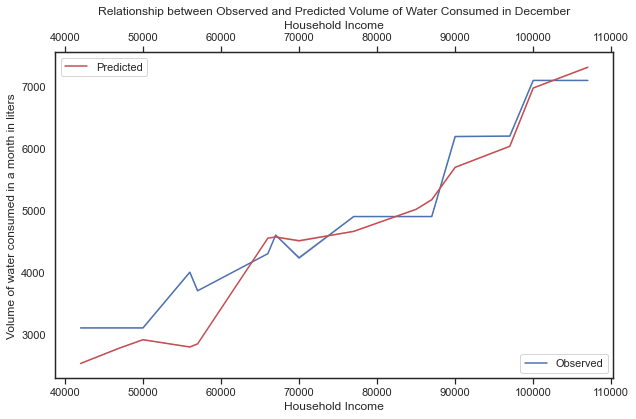

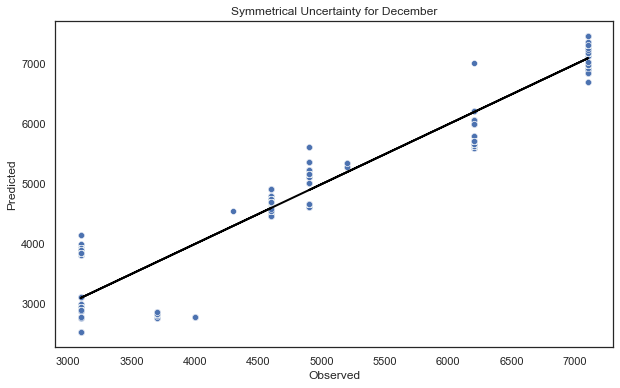

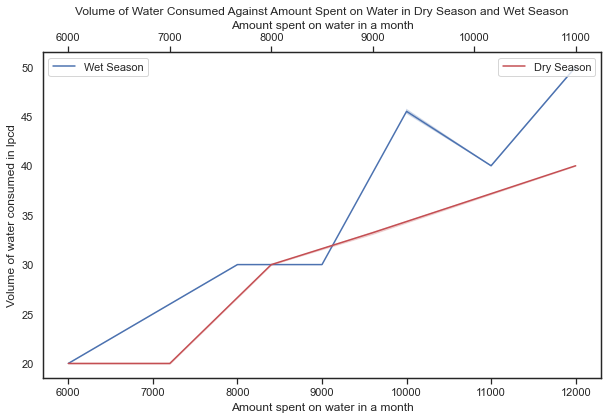

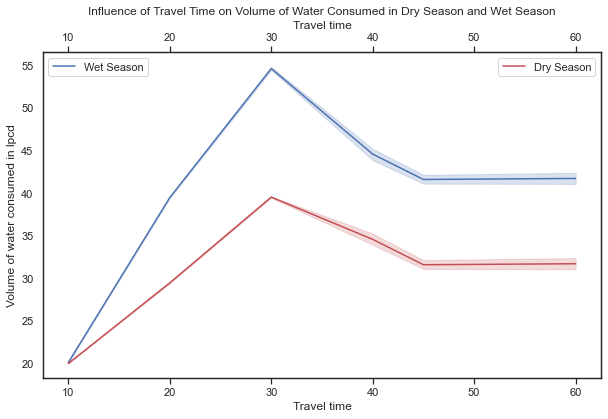

In [305]:
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)